**Interplay between inital conditions, NaK scale value and simulation output.**

This script was used to study the interplay between NaK scale values and inital conditions.

In [1]:
import numpy as np
from scipy.integrate.odepack import odeint
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm

In [2]:
import functions
from chondrocyte import Voltage_clamp
from params import params_dict

In [3]:
num_model = 10

# set time array
params_dict["t_final"] = 600
t_final = params_dict["t_final"]
dt = params_dict["dt"]
t = np.linspace(0, t_final, int(t_final/dt))

In [4]:
##sample parameter
#inital ion concentrations
sample_Na_i_0 = np.random.lognormal(mean=np.log(params_dict["Na_i_0"]), sigma=0.15, size=num_model)
sample_Na_o = np.random.lognormal(mean=np.log(params_dict["Na_o"]), sigma=0.15, size=num_model)
sample_K_i_0 = np.random.lognormal(mean=np.log(params_dict["K_i_0"]), sigma=0.15, size=num_model)
sample_K_o_0 = np.random.lognormal(mean=np.log(params_dict["K_o_0"]), sigma=0.15, size=num_model)
sample_Ca_i_0 = np.random.lognormal(mean=np.log(params_dict["Ca_i_0"]), sigma=0.15, size=num_model)
sample_Ca_o = np.random.lognormal(mean=np.log(params_dict["Ca_o"]), sigma=0.15, size=num_model)
sample_V_0 = np.random.lognormal(mean=np.log(-1*params_dict["V_0"]), sigma=0.15, size=num_model)

NaK_scale_value = np.arange(start=0.1, stop=4.5, step=0.5)

#clamp set to False if you want to see time curves
params_dict["clamp_Na_i"] = False
params_dict["clamp_K_i"] = False

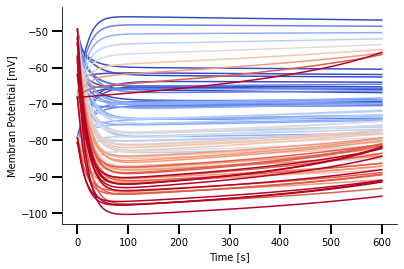

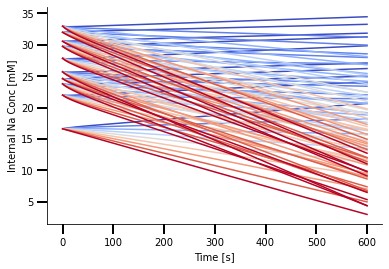

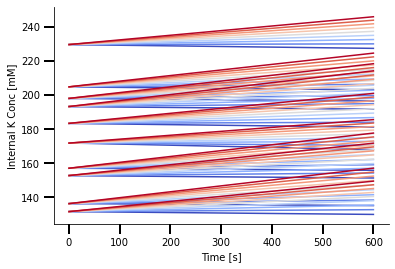

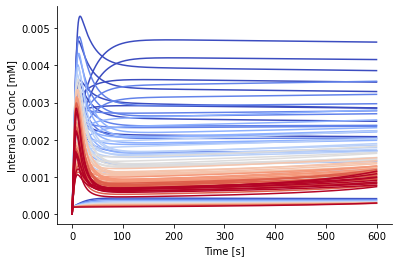

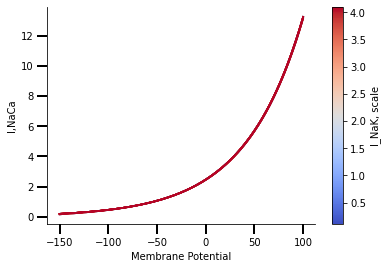

In [5]:
figs = []
axs = []
noPlots = 5

for i in range(noPlots):
    fig, ax = plt.subplots()
    figs.append(fig)
    axs.append(ax)

norm_range = mpl.colors.Normalize(vmin=NaK_scale_value[0], vmax=NaK_scale_value[-1])
cmap = cm.coolwarm

for j in range(len(NaK_scale_value)):

    count = 0
    
    while count < num_model:
        
        params_dict["I_NaK_scale"] = NaK_scale_value[j]
        params_dict["I_NaK_bar"] = params_dict["I_NaK_scale"]*70.8253*params_dict["C_m"]/params_dict["C_myo"]
        
        params_dict["Na_i_0"] = sample_Na_i_0[count]
        params_dict["Na_o"] = sample_Na_o[count]
        params_dict["K_i_0"] = sample_K_i_0[count]
        params_dict["K_o_0"] = sample_K_o_0[count]
        params_dict["Ca_i_0"] = sample_Ca_i_0[count]
        params_dict["Ca_o"] = sample_Ca_o[count]
        params_dict["V_0"] = -sample_V_0[count]
        
        V_0 = params_dict["V_0"]
        Na_i_0 = params_dict["Na_i_0"]
        K_i_0 = params_dict["K_i_0"]
        Ca_i_0 = params_dict["Ca_i_0"]
        H_i_0 = params_dict["H_i_0"]
        Cl_i_0 = params_dict["Cl_i_0"]
        a_ur_0 = params_dict["a_ur_0"]
        i_ur_0 = params_dict["i_ur_0"]
        vol_i_0 = params_dict["vol_i_0"] 
        cal_0 = params_dict["cal_0"]
        
        y0 = (V_0, Na_i_0, K_i_0, Ca_i_0, H_i_0, Cl_i_0, a_ur_0, i_ur_0, vol_i_0, cal_0)
        solution = odeint(functions.rhs, y0, t, args=(params_dict,))
    
        VV, current_dict = Voltage_clamp(solution, params_dict)
        
        axs[0].plot(t, solution[:,0], color=cmap(norm_range(params_dict["I_NaK_scale"])))
        axs[0].set_ylabel('Membran Potential [mV]')
        axs[0].set_xlabel('Time [s]')
        axs[0].xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[0].yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[0].spines['right'].set_visible(False)
        axs[0].spines['top'].set_visible(False)
        
        axs[1].plot(t, solution[:,1], color=cmap(norm_range(params_dict["I_NaK_scale"])))
        axs[1].set_ylabel('Internal Na Conc [mM]')
        axs[1].set_xlabel('Time [s]')
        axs[1].xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[1].yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[1].spines['right'].set_visible(False)
        axs[1].spines['top'].set_visible(False)
        
        axs[2].plot(t, solution[:,2], color=cmap(norm_range(params_dict["I_NaK_scale"])))
        axs[2].set_ylabel('Internal K Conc [mM]')
        axs[2].set_xlabel('Time [s]')
        axs[2].xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[2].yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[2].spines['right'].set_visible(False)
        axs[2].spines['top'].set_visible(False)
        
        axs[3].plot(t, solution[:,3], color=cmap(norm_range(params_dict["I_NaK_scale"])))
        axs[3].set_ylabel('Internal Ca Conc [mM]')
        axs[3].set_xlabel('Time [s]')
        axs[2].xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[2].yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[3].spines['right'].set_visible(False)
        axs[3].spines['top'].set_visible(False)
        
        axs[4].plot(VV,current_dict["I_NaCa"], color=cmap(norm_range(params_dict["I_NaK_scale"])))
        axs[4].set_ylabel('I,NaCa')
        axs[4].set_xlabel('Membrane Potential')
        axs[4].xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[4].yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
        axs[4].spines['right'].set_visible(False)
        axs[4].spines['top'].set_visible(False)
        
        count += 1

sm = cm.ScalarMappable(cmap=cmap, norm=norm_range)
sm.set_array([])
fig.colorbar(sm, label='I_NaK, scale')

plt.show()